# 1. Đọc bộ dữ liệu

In [2]:
import pandas as pd

data = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


<Axes: xlabel='v1'>

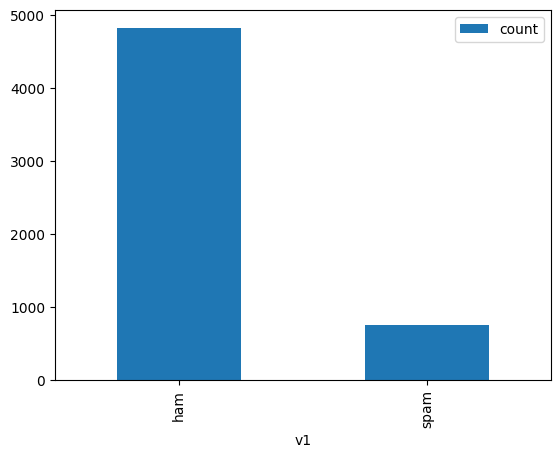

In [6]:
data['v1'].value_counts().plot(kind='bar',legend=True)

# 2. Tiền xử lý bộ dữ liệu

## a. Xoá các cột chứa giá trị NULL

In [7]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

## b. Xoá hàng trùng dữ liệu

In [9]:
data[data.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [10]:
data.drop_duplicates() 
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## c. Đổi tên cột lại để dễ hình dung

In [11]:
data.rename(columns={"v1" : "class", "v2": "message"}, inplace=True) #or data.columns = ["v1" : "class", "v2": "message"]

In [12]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## d. Xử lý ngôn ngữ
- [x] Xoá các kí tự đặc biệt, không phải chữ cái hoặc số
- [x] Đưa về chữ in thường
- [x] Loại các từ stop trong tiếng Anh
- [x] Token hoá từng từ một (unigram)
- [x] Tiến hành stem
- [x] Kết hợp các từ đã stem để tạo thành nội dung email

### i. Thuật toán PorterStemmer để áp dụng stemming cho các từ
> Stemming là quá trình loại bỏ các hậu tố của các từ để giữ lại gốc của chúng. Ví dụ:
> - ‘running’ -> ‘run’
> - ‘happily’ -> ‘happi’.

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import re

corpus = []
ps = PorterStemmer()

for i in range(0, data.shape[0]):
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data.message[i])
  message = message.lower()
  words = message.split()
  words = [ps.stem(word) for word in words if word not in set(stopwords.words('english'))]
  message = ' '.join(words)
  corpus.append(message)

### ii. Vector hoá văn bản
*Xem xét tần suất (số lần đếm) của mỗi từ xuất hiện trong toàn bộ văn bản*

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(corpus).toarray()

## e. Chuẩn hoá cột nhãn về dạng số

In [16]:
from sklearn.preprocessing import LabelEncoder 

y = LabelEncoder().fit_transform(data['class'])

# 3. Train mô hình

## a. Chia bộ dữ liệu để train

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

Train size: (4457, 6221)
Test size: (1115, 6221)


## b. Mô hình Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.3)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3)

# 4. Đánh giá mô hình

## a. Đưa ra dự doán

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = classifier.predict(X_test)

## b. Độ chính xác

In [20]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9802690582959641


## c. Confusion Matrix

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[934,  15],
       [  7, 159]], dtype=int64)

## d. Classification Report

In [22]:
classification_rep = classification_report(y_test, y_pred)

print(classification_rep)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       949
           1       0.91      0.96      0.94       166

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## e. Vẽ đồ thị heatmap

<Axes: >

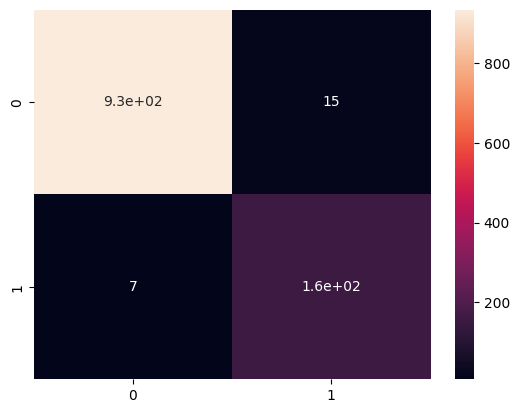

In [23]:
import seaborn as sns

sns.heatmap(conf_matrix,annot=True)

# 5. Lưu mô hình lại để tái sử dụng

In [24]:
import pickle

filename = 'cv-transform.pkl'
with open(filename, 'wb') as outfile:
    pickle.dump(cv, outfile)

filename1 = 'spam-email-model.pkl'
with open(filename1, 'wb') as outfile1:
    pickle.dump(classifier, outfile1)